Accuracy_d: 1.0


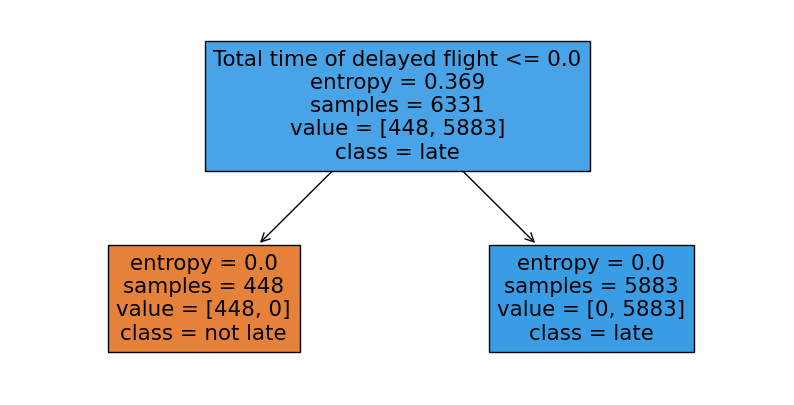

In [1]:

#Mongodb
#pip install pymongo
import pymongo


client = pymongo.MongoClient("mongodb://localhost:27017")


import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import preprocessing





#Random forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import keras

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)



df = pd.read_csv('Airline_Delay_Cause.csv')



df_1 = df.rename(columns={"arr_flights":"Number of flight arriving at airport", "arr_del15":"Number of flight more than 15 minutes late", "carrier_ct":"Number of flights delayed due to air carrier", "weather_ct":"Number of flights delayed due to weather", "nas_ct":"Number of flights delayed due to National Aviation System", "security_ct":"Number of flights delayed due to security", "late_aircraft_ct":"Number of flights delayed as a result of another flight on the same aircraft delayed", "arr_cancelled":"Number of flights cancelled", "arr_diverted":"Number of flights that were diverted", "arr_delay":"Total time of delayed flight", "carrier_delay":"Total time of delayed flight due to carrier", "weather_delay":"Total time of delayed flight due to weather", "nas_delay":"Total time of delayed flight due to national aviation system", "security_delay":"Total time of delayed flight due to security", "late_aircraft_delay":"Total number of time delayed flight as a result of a former flight on the same airplane being late"},inplace=True)

df = df.fillna(df.mean())
df.head()

# Convert the 'Total time of delayed flight' column to float64 data type
df['Total time of delayed flight'] = df['Total time of delayed flight'].astype('float64')






#convert the minutes into hour

import math



for index, row in df.iterrows():
    df.loc[index, 'Total time of delayed flight in hour'] = math.floor(row['Total time of delayed flight'] // 60)
    










# Create a new column called 'delayed' based on the values of the 'Total time of delayed flight in hour' column
df['Delayed'] = df['Total time of delayed flight in hour'].apply(lambda x: 0 if x == 0 else 1)









#Airlines Name Count


carrier_count = df['carrier_name'].value_counts()
carrier_count










Delta_Airlines_Inc = df['carrier_name'] == 'Delta Air Lines Inc.'

df = df[Delta_Airlines_Inc]

df

x=df.iloc[:,0:22].values #taken first to last column
y=df.iloc[:,22].values #have taken only last column







from sklearn.preprocessing import LabelEncoder
label_encoder_carrier = LabelEncoder()
label_encoder_carrier_name = LabelEncoder()
label_encoder_airport = LabelEncoder()
label_encoder_airport_name = LabelEncoder()
x[:,2] = label_encoder_carrier.fit_transform(x[:,2])
x[:,3] = label_encoder_carrier_name.fit_transform(x[:,3])
x[:,4] = label_encoder_airport.fit_transform(x[:,4])
x[:,5] = label_encoder_airport_name.fit_transform(x[:,5])



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_standard = scaler.fit_transform(x)
x_standard[0]










from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x)


x_normalization = norm.transform(x)




# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_normalization, y, test_size=0.3, random_state=0)



#Building Decision Tree Model
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)


# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)



#Predict the response for test dataset
y_pred = clf.predict(x_test)



# Model Accuracy, how often is the classifier correct?
print("Accuracy_d:",metrics.accuracy_score(y_test, y_pred))






from sklearn import tree
fig = plt.figure(figsize=(10,5))
tree.plot_tree(clf, feature_names = df.columns[:-1], class_names=['not late', 'late'], filled=True);














              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00      2519

    accuracy                           1.00      2714
   macro avg       1.00      1.00      1.00      2714
weighted avg       1.00      1.00      1.00      2714



Total time of delayed flight                                                                          1.0
year                                                                                                  0.0
month                                                                                                 0.0
Total number of time delayed flight as a result of a former flight on the same airplane being late    0.0
Total time of delayed flight due to security                                                          0.0
Total time of delayed flight due to national aviation system                                          0.0
Total time of delayed flight due to weather                                                           0.0
Total time of delayed flight due to carrier                                                           0.0
Number of flights that were diverted                                                                  0.0
Number of flights cancelled                   

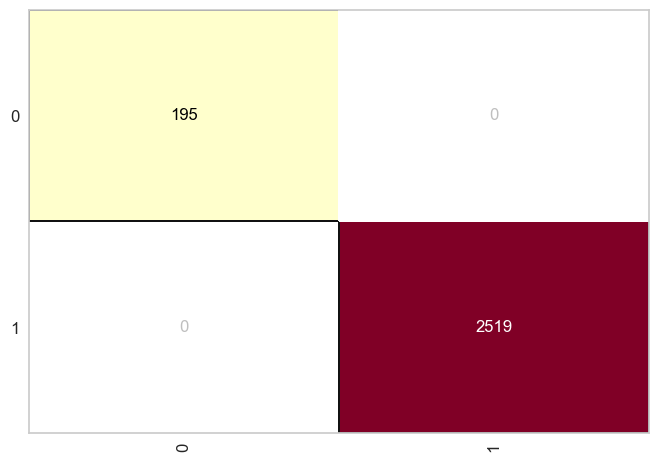

In [2]:


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(clf)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

classification_clf = (classification_report(y_test, y_pred))
print(classification_clf)


columns = df.iloc[:, 0:22].columns
feature = pd.Series(clf.feature_importances_, index = columns).sort_values(ascending = False)
feature




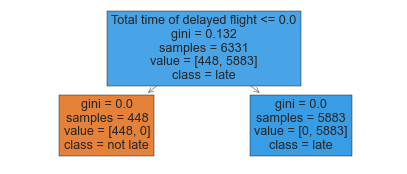

In [3]:




clf_1 = DecisionTreeClassifier(max_depth = 3, random_state = 0)
clf_1 = clf_1.fit(x_train,y_train)
DecisionTreeClassifier(max_depth = 3, random_state = 0)
pred_1 = clf_1.predict(x_test)

fig = plt.figure(figsize=(5,2))
tree.plot_tree(clf_1, feature_names = df.columns[:-1], class_names=['not late', 'late'], filled=True);










              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00      2519

    accuracy                           1.00      2714
   macro avg       1.00      1.00      1.00      2714
weighted avg       1.00      1.00      1.00      2714



Total time of delayed flight                                                                          1.0
year                                                                                                  0.0
month                                                                                                 0.0
Total number of time delayed flight as a result of a former flight on the same airplane being late    0.0
Total time of delayed flight due to security                                                          0.0
Total time of delayed flight due to national aviation system                                          0.0
Total time of delayed flight due to weather                                                           0.0
Total time of delayed flight due to carrier                                                           0.0
Number of flights that were diverted                                                                  0.0
Number of flights cancelled                   

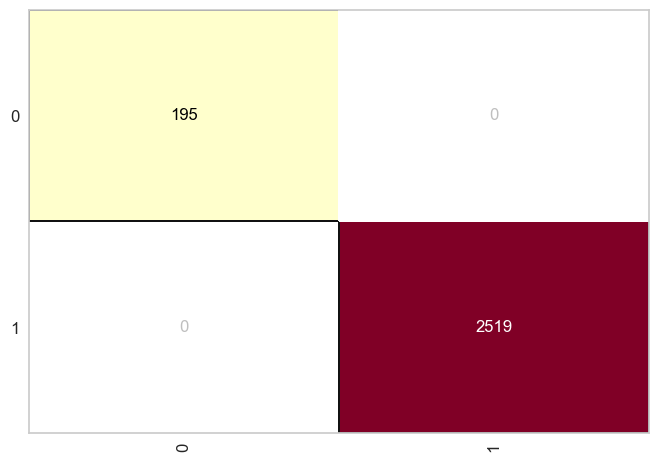

In [4]:

cm_1 = ConfusionMatrix(clf_1)
cm_1.fit(x_train, y_train)
cm_1.score(x_test, y_test)

classification_clf_1 = (classification_report(y_test, pred_1))
print(classification_clf_1)


columns_1 = df.iloc[:, 0:22].columns
feature_1 = pd.Series(clf_1.feature_importances_, index = columns).sort_values(ascending = False)
feature_1




              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00      2519

    accuracy                           1.00      2714
   macro avg       1.00      1.00      1.00      2714
weighted avg       1.00      1.00      1.00      2714



Total time of delayed flight in hour                                                                  0.282767
Total time of delayed flight                                                                          0.252405
Number of flight more than 15 minutes late                                                            0.126492
Total time of delayed flight due to carrier                                                           0.116233
Total number of time delayed flight as a result of a former flight on the same airplane being late    0.059817
Number of flights delayed due to air carrier                                                          0.043011
Number of flights delayed due to National Aviation System                                             0.039090
Total time of delayed flight due to national aviation system                                          0.033444
Number of flights delayed as a result of another flight on the same aircraft delayed                  0.019288
N

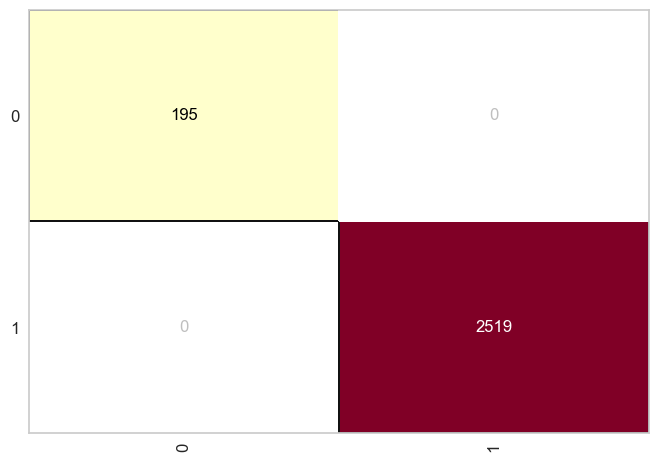

In [5]:


random_forest = RandomForestClassifier(n_estimators = 100, max_depth = 3, criterion = 'entropy', random_state = 0)
random_forest.fit(x_train, y_train)
RandomForestClassifier(max_depth = 3, criterion = 'entropy', random_state = 0)
predict = random_forest.predict(x_test)


cm_2 = ConfusionMatrix(random_forest)
cm_2.fit(x_train, y_train)
cm_2.score(x_test, y_test)


classification_clf_2 = (classification_report(y_test, predict))
print(classification_clf_2)

columns_2 = df.iloc[:, 0:22].columns
feature_2 = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_2







              precision    recall  f1-score   support

           0       0.33      0.08      0.12       195
           1       0.93      0.99      0.96      2519

    accuracy                           0.92      2714
   macro avg       0.63      0.53      0.54      2714
weighted avg       0.89      0.92      0.90      2714



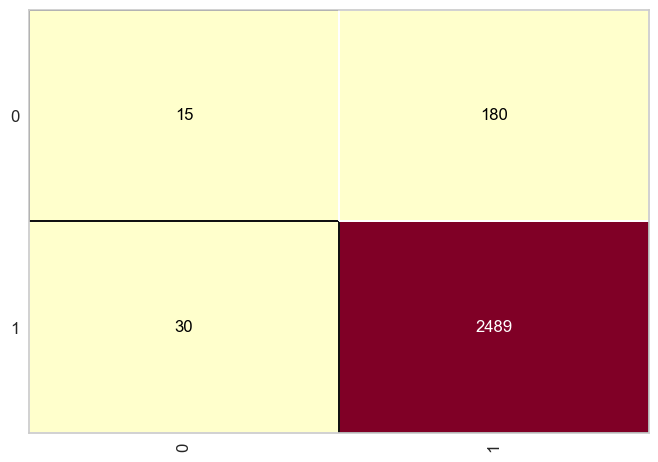

In [6]:






from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric = 'minkowski', p=2)

k_list = list(range(1,31))
k_values = dict(n_neighbors = k_list)


from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(knn, k_values, cv = 5, scoring = 'accuracy')
grid.fit(x_train, y_train)



grid.best_params_

grid.best_score_

knn = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p=2)
knn.fit(x_train, y_train)


predict_4 = knn.predict(x_test)


cm_4 = ConfusionMatrix(knn)
cm_4.fit(x_train, y_train)
cm_4.score(x_test, y_test)

classification_knn = (classification_report(y_test, predict_4))
print(classification_knn)


data = df.to_dict(orient = "records") #converting data into dictionary
db = client.Delta_Airlines_Inc
db.Delta_Airlines_Inc.insert_many(data)





